# ORDINAL REGRESSION APPLIED TO CAR RATING

## IMPORTING USEFUL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression

from mord import LogisticIT, LogisticAT, OrdinalRidge

## DEFINING FUNCTIONS

FUNCTION FOR DATABASE PREPARATION (ONE-HOT-ENCODING)

In [2]:
def prepare(df, listnum,listcat):
    df_ready = df[listnum]
    for c in listcat:
        df_ready = pd.concat([df_ready, pd.get_dummies(df[c], drop_first=True, prefix=c)], axis=1)
    return df_ready

MAIN FUNCTION FOR MODEL EVALUATION

In [25]:
def oraculo(X, y, model, params={}):
    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=.2, stratify=y, random_state=3001)
    pipeline = Pipeline([('column', StandardScaler()),
                         ('model', model)])
    print('Estimador: ', model)
    grid = GridSearchCV(pipeline, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, verbose=1)
    grid.fit(X_train, y_train)
    pred = grid.best_estimator_.predict(X_test)
    print('Mean Absolute Error: %1.4f' % (metrics.mean_absolute_error(y_test,pred)))
    print('Accuracy: %1.4f\n' % (metrics.accuracy_score(y_test,np.round(pred).astype(int))))
    print(metrics.classification_report(y_test,np.round(pred).astype(int)))
    print('\n\n')

### DATA LOADING AND PREPARATION

In [4]:
os.chdir('/path/to/file/')

LOADING DATASET

In [5]:
df = pd.read_csv('car_evaluation.csv',sep=';')

SELECTING NUMERIC AND CATEGORICAL FEATURES

In [6]:
listnum = ['evaluation']
listcat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

PRE-PROCESSING

In [7]:
df_final = prepare(df,listnum,listcat)

CHOOSING MODELS AND PARAMETERS

In [54]:
models = [LinearRegression(), LogisticRegression(), LogisticIT(), LogisticAT()]
params = [{},{'model__max_iter': [100], 'model__C': [1.0]},
          {'model__max_iter': [100], 'model__alpha': [1.0]},
          {'model__max_iter': [100], 'model__alpha': [1.0]}]

MODEL TRAINING AND EVALUATION

In [55]:
for m,p in zip(models, params):
    oraculo(df_final.drop('evaluation',axis=1), df_final['evaluation'], m, p)

Estimador:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
/disk1ssd/home/szm6548/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/disk1ssd/home/szm6548/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


{}
Mean Absolute Error: 0.3769
Accuracy: 0.7543

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.76      0.86       242
           2       0.52      0.99      0.68        77
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        13

    accuracy                           0.75       346
   macro avg       0.30      0.35      0.31       346
weighted avg       0.81      0.75      0.76       346




Estimador:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
/disk1ssd/home/szm6548/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/disk1ssd/home/szm6548/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


{'model__C': 1.0, 'model__max_iter': 100}
Mean Absolute Error: 0.1503
Accuracy: 0.8786

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       242
           2       0.70      0.83      0.76        77
           3       0.83      0.36      0.50        14
           4       0.75      0.23      0.35        13

    accuracy                           0.88       346
   macro avg       0.81      0.59      0.64       346
weighted avg       0.88      0.88      0.87       346




Estimador:  LogisticIT(alpha=1.0, max_iter=1000, verbose=0)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


{'model__alpha': 1.0, 'model__max_iter': 100}
Mean Absolute Error: 0.0954
Accuracy: 0.9046

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       242
           2       0.80      0.84      0.82        77
           3       0.47      0.50      0.48        14
           4       1.00      0.62      0.76        13

    accuracy                           0.90       346
   macro avg       0.81      0.73      0.76       346
weighted avg       0.91      0.90      0.90       346




Estimador:  LogisticAT(alpha=1.0, max_iter=1000, verbose=0)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'model__alpha': 1.0, 'model__max_iter': 100}
Mean Absolute Error: 0.0925
Accuracy: 0.9075

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       242
           2       0.83      0.84      0.84        77
           3       0.50      0.71      0.59        14
           4       1.00      0.46      0.6

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


PLOT A COMPARISON OF MODEL PERFORMANCES

Text(0, 0.5, 'MAE')

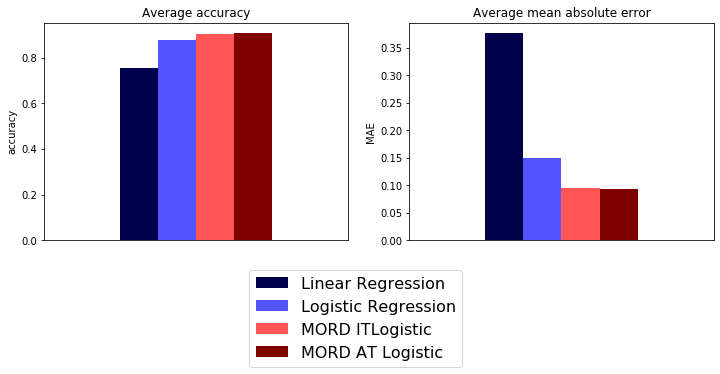

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pd.DataFrame({'Linear Regression':[0.7543],'Logistic Regression':[0.8786],'ITLogistic':[0.9046],'ATLogistic':[0.9075]}).plot(kind='bar', cmap='seismic',ax=ax[0])
pd.DataFrame({'Linear Regression':[0.3769],'Logistic Regression':[0.1503],'MORD ITLogistic':[0.0954],'MORD AT Logistic':[0.0925]}).plot(kind='bar', cmap='seismic', ax=ax[1])
ax[0].title.set_text('Average accuracy')
ax[1].title.set_text('Average mean absolute error')
ax[0].get_legend().remove()
ax[1].legend(bbox_to_anchor=(.2, -0.1), fontsize = 16.0)
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel('MAE')